In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

import pickle


In [2]:

n_filesets = 3

n_points = 4

input_dir = np.empty( shape=(n_filesets, n_points), dtype=object )

#--- 

si = 0

input_dir[si,0] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-0.00-nens01'
input_dir[si,1] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-0.50-nens01'
input_dir[si,2] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-1.00-nens01'
input_dir[si,3] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-1.50-nens01'


#--- 

si = 1

input_dir[si,0] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-0.00-nens01-allsamesample'
input_dir[si,1] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-0.50-nens01-allsamesample'
input_dir[si,2] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-1.00-nens01-allsamesample'
input_dir[si,3] = 'output-run-nn-study-nd-v1d-ndim1-res-sf-1.50-nens01-allsamesample'

#--- 

si = 2

input_dir[si,0] = 'output-run-nn-study-nd-v1c-ndim1-res-sf-0.00'
input_dir[si,1] = 'output-run-nn-study-nd-v1c-ndim1-res-sf-0.50'
input_dir[si,2] = 'output-run-nn-study-nd-v1c-ndim1-res-sf-1.00'
input_dir[si,3] = 'output-run-nn-study-nd-v1c-ndim1-res-sf-1.50'





In [ ]:
try:
    os.mkdir( 'paper-plots' )
except:
    print('\n\n Output directory already exists:' )


In [3]:
res_vals = np.empty( shape=(n_points), dtype=float )

for pi in range( n_points ) :
    
    with open( '%s/config-pars.pkl' % input_dir[0,pi], 'rb') as f :
        mc_mu = pickle.load(f)
        mc_rho = pickle.load(f)
        mc_sig = pickle.load(f)
        true_mu = pickle.load(f)
        true_rho = pickle.load(f)
        true_sig = pickle.load(f)
        resolution = pickle.load(f)
        mc_cov = pickle.load(f)
        true_cov = pickle.load(f)
        
    res_vals[pi] = resolution[0]
    
    print(' %2d : %s  resolution = %.2f' % (pi, input_dir[0,pi], res_vals[pi]))

  0 : output-run-nn-study-nd-v1d-ndim1-res-sf-0.00-nens01  resolution = 0.00
  1 : output-run-nn-study-nd-v1d-ndim1-res-sf-0.50-nens01  resolution = 0.25
  2 : output-run-nn-study-nd-v1d-ndim1-res-sf-1.00-nens01  resolution = 0.50
  3 : output-run-nn-study-nd-v1d-ndim1-res-sf-1.50-nens01  resolution = 0.75


In [4]:
ave_mean = np.empty( shape=(n_filesets, n_points), dtype=float )
rms_mean = np.empty( shape=(n_filesets, n_points), dtype=float )
ave_cov  = np.empty( shape=(n_filesets, n_points), dtype=float )
rms_cov  = np.empty( shape=(n_filesets, n_points), dtype=float )

In [5]:
print()

for di in range( n_filesets ) :
    for pi in range( n_points ) :
        
        print('Reading %s' % input_dir[di,pi] )
        with open( '%s/simple-calc-results.npy' % input_dir[di,pi], 'rb' ) as f :
            this_ave_mean  = np.load(f)
            this_rms_mean = np.load(f)
            this_ave_cov = np.load(f)
            this_rms_cov = np.load(f)
            
        ave_mean[di,pi] = this_ave_mean[0]
        rms_mean[di,pi] = this_rms_mean[0]
        ave_cov[di,pi]  = this_ave_cov[0,0]
        rms_cov[di,pi]  = this_rms_cov[0,0]
        
    print()
            


Reading output-run-nn-study-nd-v1d-ndim1-res-sf-0.00-nens01
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-0.50-nens01
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-1.00-nens01
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-1.50-nens01

Reading output-run-nn-study-nd-v1d-ndim1-res-sf-0.00-nens01-allsamesample
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-0.50-nens01-allsamesample
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-1.00-nens01-allsamesample
Reading output-run-nn-study-nd-v1d-ndim1-res-sf-1.50-nens01-allsamesample

Reading output-run-nn-study-nd-v1c-ndim1-res-sf-0.00
Reading output-run-nn-study-nd-v1c-ndim1-res-sf-0.50
Reading output-run-nn-study-nd-v1c-ndim1-res-sf-1.00
Reading output-run-nn-study-nd-v1c-ndim1-res-sf-1.50



In [6]:
calc_rms_mean = np.empty( shape=(n_points), dtype=float )
calc_rms_cov  = np.empty( shape=(n_points), dtype=float )

for pi in range( n_points ) :
    
    calc_rms_mean[pi] = np.sqrt( rms_mean[0,pi]*rms_mean[0,pi] - rms_mean[1,pi]*rms_mean[1,pi] )
    calc_rms_cov[pi]  = np.sqrt( rms_cov[0,pi] *rms_cov[0,pi]  - rms_cov[1,pi] *rms_cov[1,pi]  )


<function matplotlib.pyplot.show(close=None, block=None)>

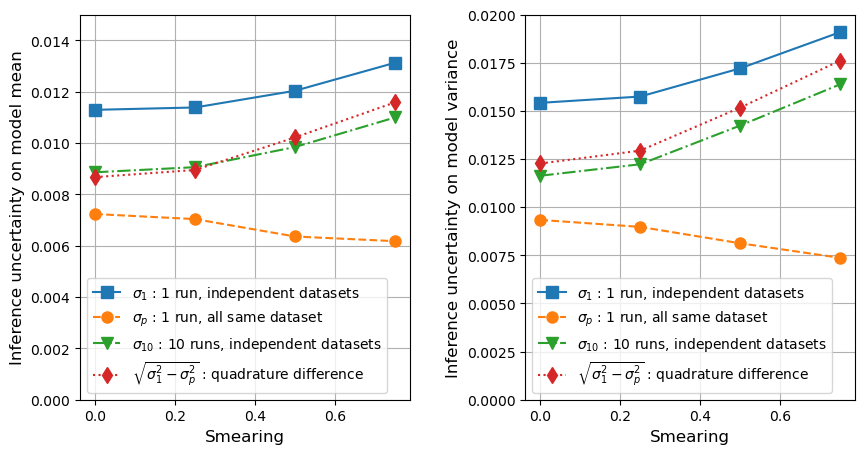

In [37]:
fig,ax = plt.subplots( 1, 2, figsize=(2*5,5) )

fsize=12
ms = 8

axi = ax[0]

axi.plot( res_vals, rms_mean[0,:], label='$\sigma_1$ : 1 run, independent datasets',
         markersize=ms, linestyle='solid', marker='s')
axi.plot( res_vals, rms_mean[1,:], label='$\sigma_p$ : 1 run, all same dataset',
         markersize=ms, linestyle='dashed', marker='o')
axi.plot( res_vals, rms_mean[2,:], label='$\sigma_{10}$ : 10 runs, independent datasets',
         markersize=ms, linestyle='dashdot', marker='v')
axi.plot( res_vals, calc_rms_mean[:], label='$\sqrt{\sigma_1^2 - \sigma_p^2}$ : quadrature difference',
         markersize=ms, linestyle='dotted', marker='d')

axi.set_ylim([0.,0.0150])

axi.legend()

axi.grid(True)

axi.set_xlabel( 'Smearing', fontsize=fsize )
axi.set_ylabel( 'Inference uncertainty on model mean', fontsize=fsize)



axi = ax[1]

axi.plot( res_vals, rms_cov[0,:], label='$\sigma_1$ : 1 run, independent datasets',
         markersize=ms, linestyle='solid', marker='s')
axi.plot( res_vals, rms_cov[1,:], label='$\sigma_p$ : 1 run, all same dataset',
         markersize=ms, linestyle='dashed', marker='o')
axi.plot( res_vals, rms_cov[2,:], label='$\sigma_{10}$ : 10 runs, independent datasets',
         markersize=ms, linestyle='dashdot', marker='v')
axi.plot( res_vals, calc_rms_cov[:], label='$\sqrt{\sigma_1^2 - \sigma_p^2}$ : quadrature difference',
         markersize=ms, linestyle='dotted', marker='d')


axi.set_ylim([0.,0.0200])

axi.legend()


axi.grid(True)

axi.set_xlabel( 'Smearing', fontsize=fsize )
axi.set_ylabel( 'Inference uncertainty on model variance', fontsize=fsize)





plt.subplots_adjust( wspace=0.35 )


plt.savefig( 'paper-plots/ensemble-comp-vs-resolution.pdf', bbox_inches='tight' )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

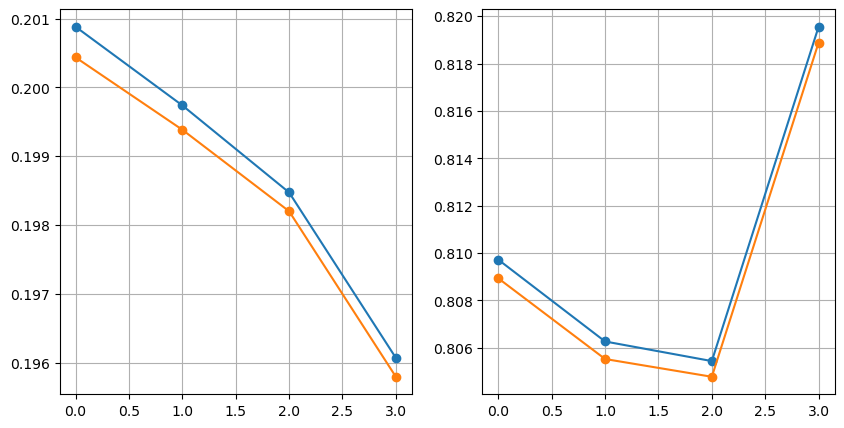

In [8]:
fig,ax = plt.subplots( 1, 2, figsize=(2*5,1*5))

axi = ax[0]

axi.plot( ave_mean[0,:], marker='o')
axi.plot( ave_mean[2,:], marker='o')

#axi.set_ylim([0.,0.0170])

axi.grid(True)



axi = ax[1]

axi.plot( ave_cov[0,:], marker='o')
axi.plot( ave_cov[2,:], marker='o')


#axi.set_ylim([0.,0.0200])

axi.grid(True)


plt.show